In [1]:
import numpy as np
import pandas as pd
from implementations import *
import matplotlib.pyplot as plt
import seaborn as sns

The hypothesis of this part is that a character importance in a movie can be approximated by the number of occurence of its name in the resume

In [2]:
## load files
character_md = load_character_md()
tvtropes_clusters = load_tvtropes_clusters()
movie_md = load_movie_md()
name_clusters = load_name_clusters()
plot_summaries = load_plot_summaries()

In [3]:
epochs = [1914, 1960, 2000, 2022]

In [4]:
def keep_year(date):
    return date[:4]

In [5]:
## let's merge summaries with character_md
char_summaries = character_md.merge(plot_summaries, on = 'Wikipedia movie ID', how ='inner')
char_summaries = char_summaries.dropna(subset=['Character name', 'summary', 'Movie release date'])
char_summaries['Movie release date'] = char_summaries['Movie release date'].astype(str).apply(keep_year)

In [6]:
char_summaries = char_summaries[char_summaries['Movie release date'].astype(int)>1900]
char_summaries['Movie release date'] = char_summaries['Movie release date'].astype(int)

In [44]:
## We define a function that count the number of occurence of a character name in a resume
## it also take into account that sometimes the character is called by a part of its name.
## example : Jericho for Sgt Jericho Butler 
## the goal of this function is then to by used as an apply on each row of merged_df

def counter(char_name, resume):
    char_list = char_name.split()
    counter = 0
    words_to_remove = ['the', 'The', 'Sgt', 'Big', 'nan', 'NaN', 'in', 'as', 'a', 'child', 
                       'with', 'teenager', 'woman', 'man', 'som', 'and', 'of', 'at', 'on', 
                       'de', ',']
    for wtr in words_to_remove:
        try:
            char_list.remove(wtr)
        except:
            counter = 0
    for char in char_list:
        counter += resume.count(char)
    return counter

# apply it on each columns
char_summaries['name occurence in summary'] = char_summaries.apply(lambda row : counter(str(row['Character name']), row['summary']), axis = 1)
char_summaries = char_summaries.dropna(subset = ['name occurence in summary', 'Actor gender', 'Movie release date'])
df_epochs = [char_summaries.query('`Movie release date` >=' + str(epochs[i]+1) + ' and `Movie release date` <= ' + str(epochs[i+1])) for i in range(len(epochs)-1)]

In [45]:
male_char_summaries = char_summaries[char_summaries['Actor gender']=='M']
female_char_summaries = char_summaries[char_summaries['Actor gender']=='F']

print('length of DataFrame for females in summaries : {}'.format(len(female_char_summaries)))
print('length of DataFrame for males in summaries   : {}'.format(len(male_char_summaries)))

length of DataFrame for females in summaries : 48213
length of DataFrame for males in summaries   : 87654


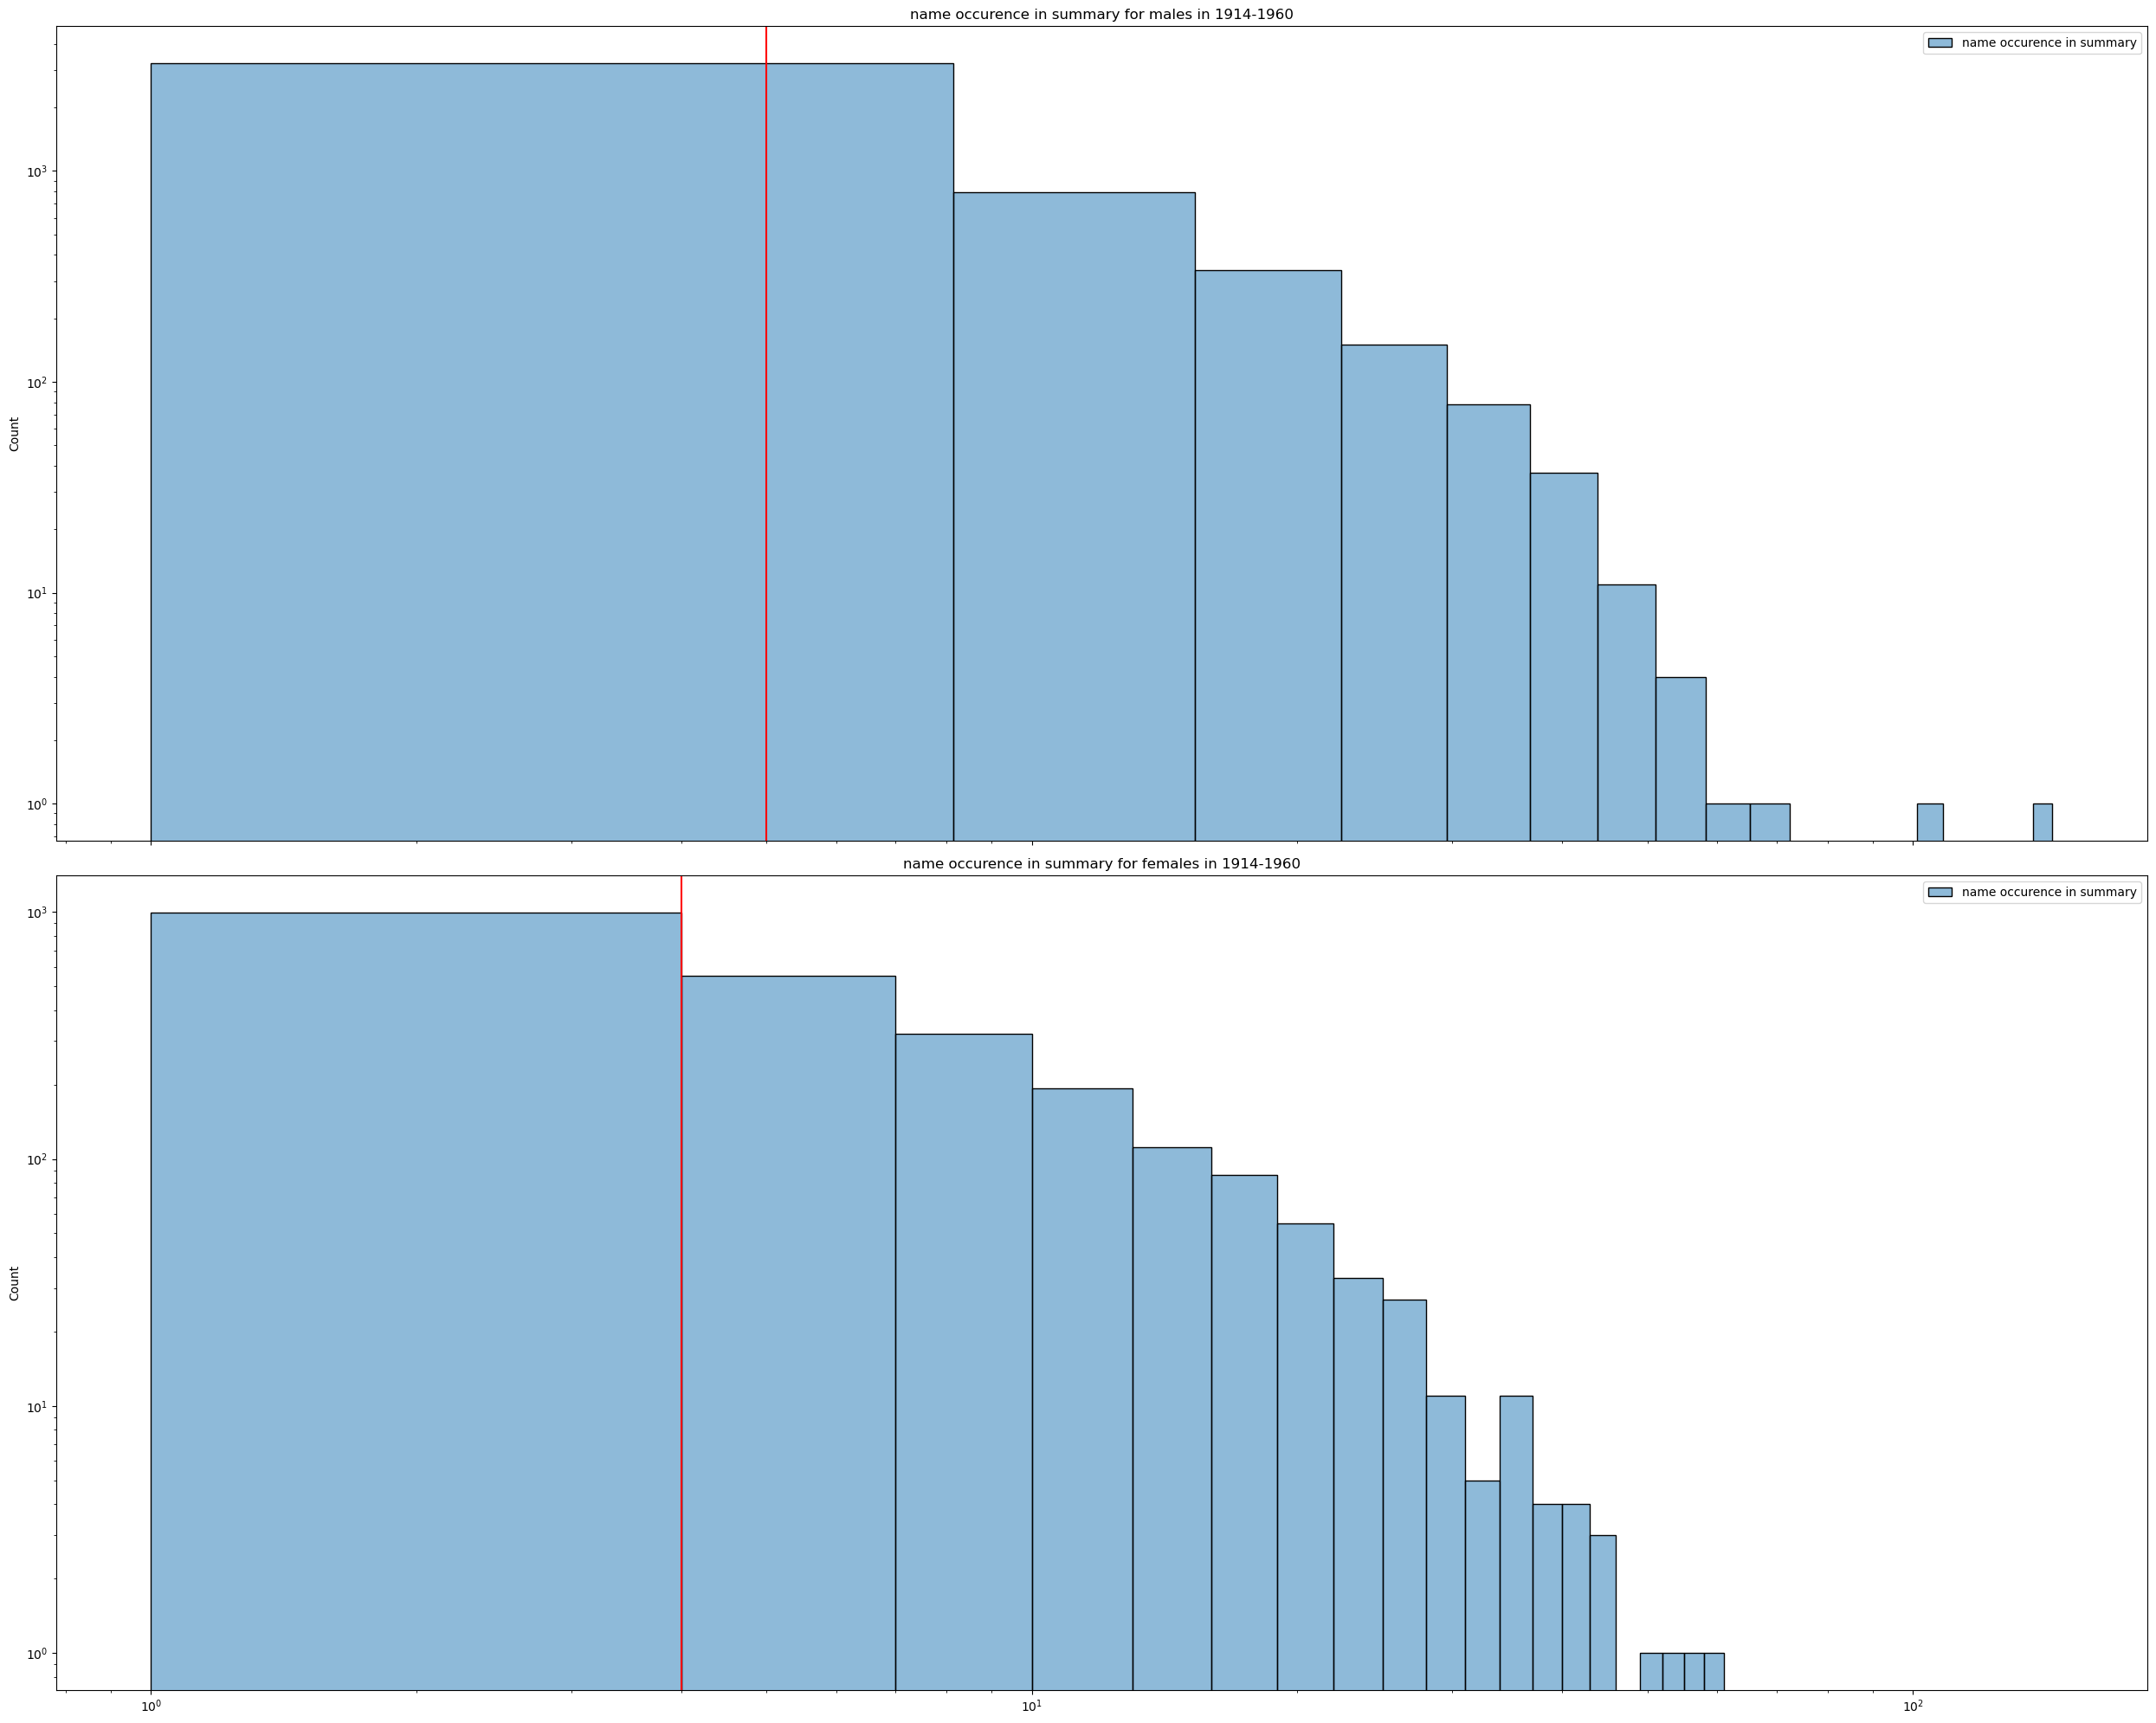

In [76]:
epoch = 0
epoch_range = str(epochs[epoch]) + '-' + str(epochs[epoch+1])

f, ax = plt.subplots(2, 1, figsize=(25, 20), sharex = True)
# for males
sns.histplot(df_epochs[epoch][(df_epochs[epoch]['Actor gender']=='M')&(df_epochs[epoch]['name occurence in summary']>0)][['name occurence in summary']], ax = ax[0], bins = 20)
ax[0].axvline(df_epochs[epoch][(df_epochs[epoch]['Actor gender']=='M')&(df_epochs[epoch]['name occurence in summary']>0)]['name occurence in summary'].median(), color ='red')
sns.histplot(df_epochs[epoch][(df_epochs[epoch]['Actor gender']=='F')&(df_epochs[epoch]['name occurence in summary']>0)][['name occurence in summary']], ax = ax[1], bins = 20)
ax[1].axvline(df_epochs[epoch][(df_epochs[epoch]['Actor gender']=='F')&(df_epochs[epoch]['name occurence in summary']>0)]['name occurence in summary'].median(), color ='red')
ax[0].set_title('name occurence in summary for males in ' + epoch_range)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_title('name occurence in summary for females in ' + epoch_range)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
f.tight_layout()

In [80]:
#first_role = 
df_epochs[0].sort_values(['Wikipedia movie ID', 'name occurence in summary'], ascending = False)[['Wikipedia movie ID','Character name' ,'name occurence in summary']].drop_duplicates(subset = ['Wikipedia movie ID']).head(30)

,Wikipedia movie ID,Character name,name occurence in summary
183680,36567002,Jimmy Heldon,4
172994,36548689,Shanno,6
265474,36467457,Record Boxing Coach/Old Mailman/Fighter's Yell,0
106275,36422681,Elizabeth,0
249606,36354224,Long John,0
94872,36353890,Specialty Dancer,0
258303,36097069,Bless Keough,11
40943,36092739,Dave Shaw,0
134382,36091940,Maisie,9
90543,36090388,Corey Scott,2
